In [1]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import copy
import tensorflow as tf

In [2]:
with open("Data/SeoulBikeData.csv", 'rb') as f:
    result = chardet.detect(f.read())

detected_encoding = result['encoding']

df = pd.read_csv("Data/SeoulBikeData.csv", encoding=detected_encoding)

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.drop(["Date", "Holiday", "Seasons"], axis = 1, inplace = True)

In [5]:
column_names = ["bike_count", "hour", "Temp", "Humidity", "Wind Speed", "Visibility", "Dew Point Temp", "Solar Radiation", "Rainfall", "Snowfall", "Functioning"]
df.columns = column_names

In [6]:
df["Functioning"] = df["Functioning"].map({"Yes": 1, "No": 0})

In [7]:
df.head()

,bike_count,hour,Temp,Humidity,Wind Speed,Visibility,Dew Point Temp,Solar Radiation,Rainfall,Snowfall,Functioning
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [8]:
df = df[df["hour"] == 12] # noon
df.drop("hour", axis = 1, inplace = True)

In [9]:
df.head()

,bike_count,Temp,Humidity,Wind Speed,Visibility,Dew Point Temp,Solar Radiation,Rainfall,Snowfall,Functioning
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


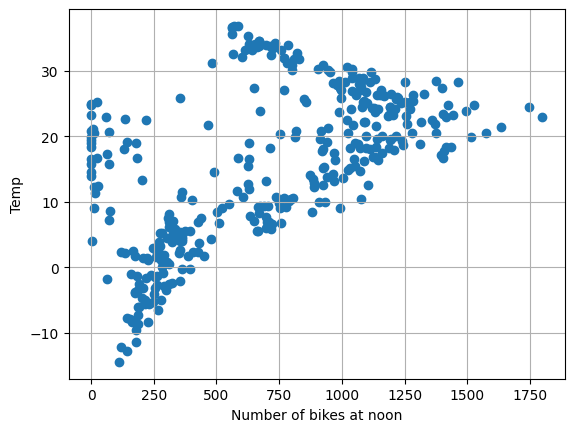

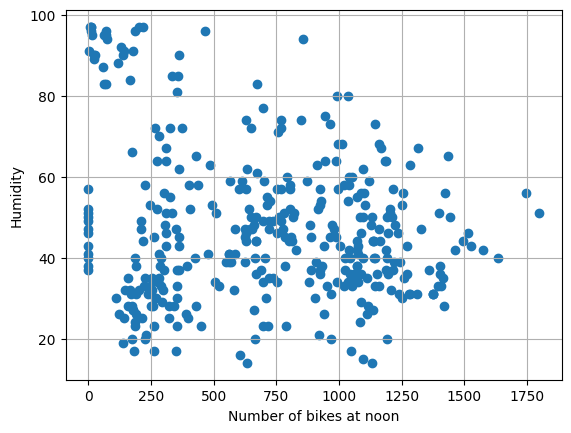

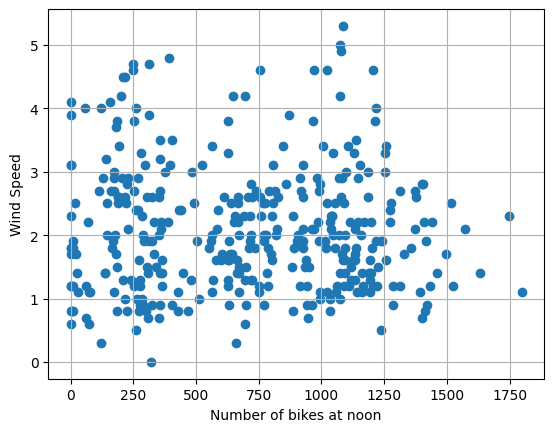

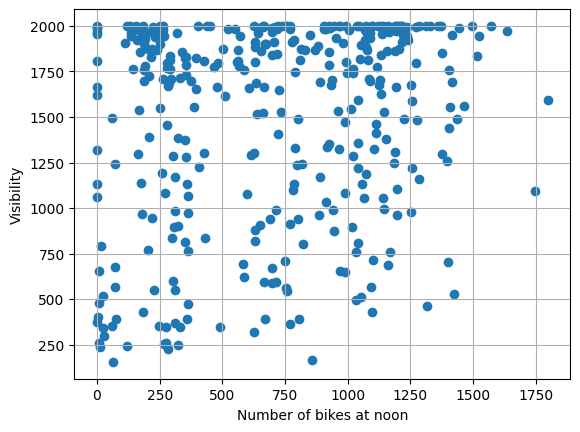

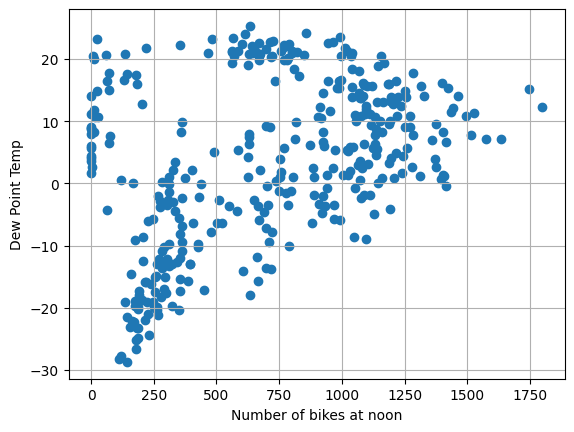

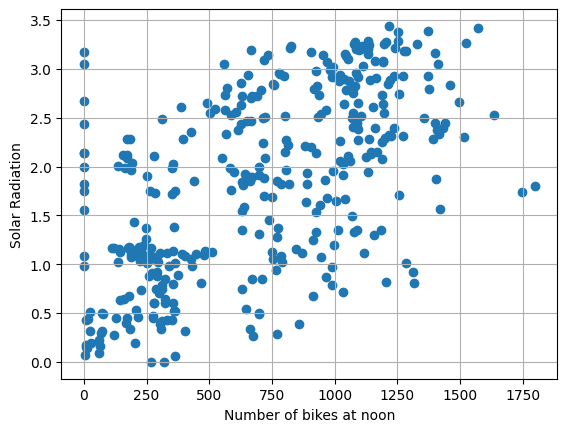

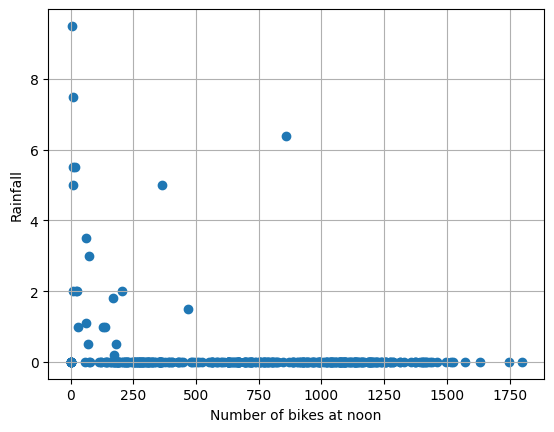

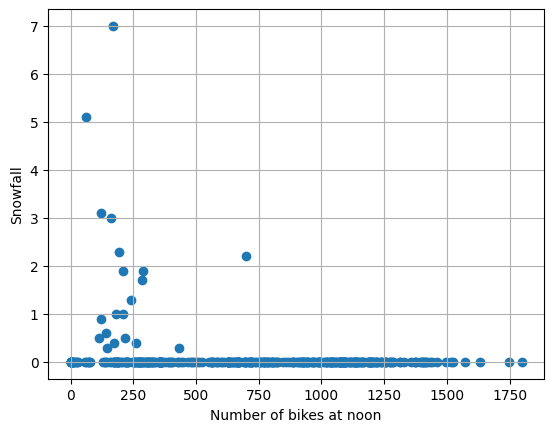

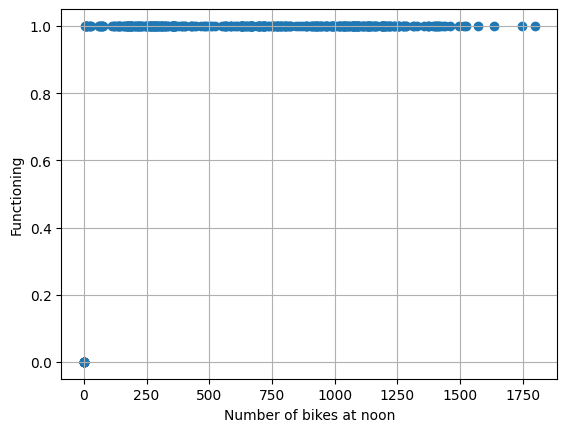

In [10]:
for column in df.columns[1:]:
    plt.scatter(df["bike_count"], df[column])
    plt.xlabel("Number of bikes at noon")
    plt.ylabel(column)
    plt.grid()
    plt.show()

In [11]:
df.drop(["Wind Speed", "Visibility", "Functioning"], inplace = True, axis = 1)

In [12]:
df.head()

,bike_count,Temp,Humidity,Dew Point Temp,Solar Radiation,Rainfall,Snowfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [13]:
# Splitting data into training, test, and validation
training_data, test_data, validation_data = np.split(df.sample(frac = 1), [int(len(df) * 0.6), int(len(df) * 0.8)])

In [14]:
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[column for column in dataframe.columns[1:] if column != y_label]].values # .values makes array of each row and appends them into a list
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1) # making array for each of the value present inside the respective column
        else:
            X = dataframe[x_labels].values
    
    y =  dataframe[y_label].values.reshape(-1, 1)
    
    data = np.hstack((X, y))
    
    return data, X, y

# Single Linear Regression

In [15]:
_, X_train_temp, y_train_temp = get_xy(training_data, "bike_count", x_labels = ["Temp"])
_, X_val_temp, y_val_temp = get_xy(validation_data, "bike_count", x_labels = ["Temp"])
_, X_test_temp, y_test_temp = get_xy(test_data, "bike_count", x_labels = ["Temp"])

In [16]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

<IPython.core.display.Javascript object>

LinearRegression()

In [17]:
temp_reg.score(X_test_temp, y_test_temp)

0.396041804207347

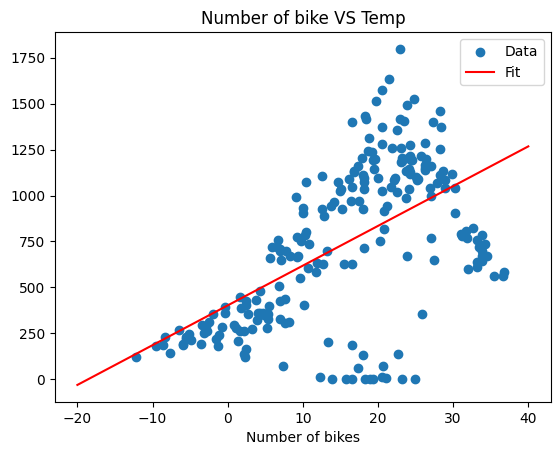

In [18]:
plt.scatter(X_train_temp, y_train_temp, label = "Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red")
plt.title("Number of bike VS Temp")
plt.xlabel("Temp")
plt.xlabel("Number of bikes")
plt.legend()
plt.show()

# Multiple Linear Regression

In [19]:
training_data, test_data, validation_data = np.split(df.sample(frac = 1), [int(len(df) * 0.6), int(len(df) * 0.8)])
_, X_train_all, y_train_all = get_xy(training_data, "bike_count", x_labels = df.columns[1:])
_, X_val_all, y_val_all = get_xy(validation_data, "bike_count", x_labels = df.columns[1:])
_, X_test_all, y_test_all = get_xy(test_data, "bike_count", x_labels = df.columns[1:])

In [20]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

<IPython.core.display.Javascript object>

LinearRegression()

In [21]:
all_reg.score(X_test_all, y_test_all)

0.6208734342991062

# Regression with Neural Net

In [22]:
def plot_loss(history):
    plt.plot(history.history["loss"], label = "Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [24]:
temp_nn = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [25]:
temp_nn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = "mean_squared_error"
)

In [26]:
history = temp_nn.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp, y_val_temp)
)

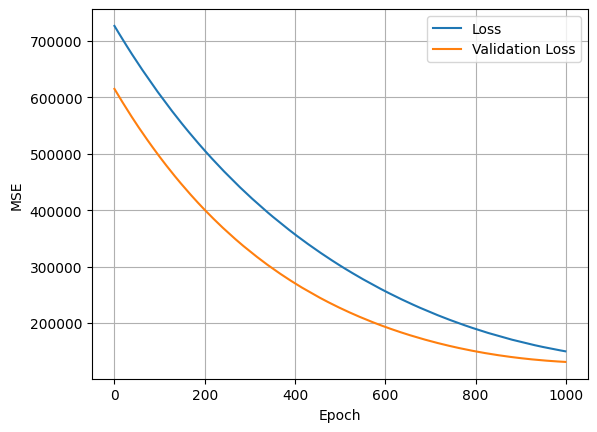

In [27]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


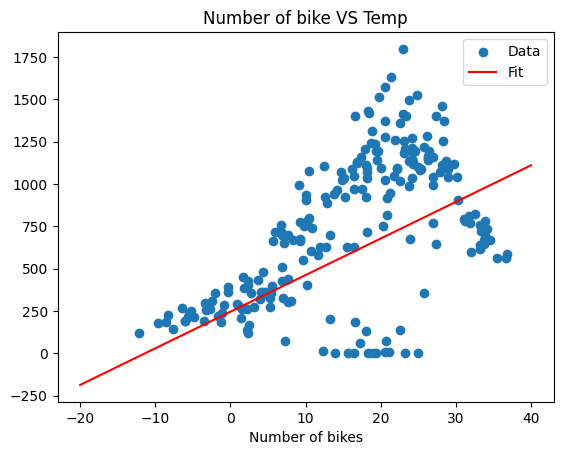

In [28]:
plt.scatter(X_train_temp, y_train_temp, label = "Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red")
plt.title("Number of bike VS Temp")
plt.xlabel("Temp")
plt.xlabel("Number of bikes")
plt.legend()
plt.show()